# Making Informed Investment Decisions in California Housing Market using Machine Learning

**Team Name:** Code Wizards <br>
Team Members : Bhavya Hegde, Blessy Dickson Daniel Moses, Darshini Venkatesha Murthy Nag, Sirisha Polisetty

**Work Distribution:**<br/>
Bhavya Hegde - Data preprocessing, Imputation, Regression <br/>
Blessy Dickson Daniel Moses - Upsampling and downsampling RENT, rerun classifiers based on data distribution and data visualization <br/>
Darshini Venkatesha Murthy Nag - Upsampling and Downsampling on TOTAL_CRIME feature, rerun classifiers based on data distribution and visualization  <br/>
Sirisha Polisetty - Muller loop to establish baseline classifer and decision tree classifier<br/>



**Business Narrative :**
Our mission is to provide valuable insights and guidance to prospective investors and homebuyers, empowering them to make informed decisions about investing in real estate. We understand that real estate is a significant financial commitment, and it’s crucial to assess its viability thoroughly. Through our platform, we offer a comprehensive suite of tools, data, and expertise to help individuals navigate the complex world of real estate investments.

In [ ]:
!pip install holoviews bokeh pydrive ipywidgets scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id="1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"

In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table


import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
data=pd.read_csv("RF_Housingdata_final_new.csv")

#Data Narrative

Main dataset is downloaded from redfin and uploaded here : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped data for
walk score is from : https://www.walkscore.com/
crime rate , property crime: https://247wallst.com/state/crime-in-california/
School rating : https://www.niche.com/places-to-live/z/95134/

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B)

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE:** This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE:** The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE:** This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS:** The specific address of the property, providing detailed location information.

**CITY:** The city where the property is located.

**STATE OR PROVINCE:** The state or province where the property is situated.

**ZIP_CODE:** The postal code of the property's location, which can be used for regional analysis.

**PRICE:** The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS:** The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS:** The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE:** The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#:** The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE:** A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED:** This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE:** These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE:** A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME:** This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME:** A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING:** This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children  

**MONTHLY_RENT_ESTIMATE** : Indicates the monthly rent estimate of the property.

**ANNUAL_RENT_ESTIMATE** : Indicates the annual rent estimate of the property.

**MORTGAGE_FEES_PER_MONTH** : Indicates indicate the additional costs, beyond principal and interest, included in the monthly mortgage payment, such as property taxes, insurance, and other related expenses.

**MORTGAGE_FEES_PER_YEAR** : Indicates the total annual cost of additional expenses, beyond principal and interest, associated with your mortgage, including property taxes, insurance, and related fees.

In [ ]:
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,37.817373,-122.254688,84,6421,7692,712.0,5350,64200,3203,38436
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,37.835305,-122.221226,30,6421,7692,582.0,10750,129000,6437,77244
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,37.835468,-122.276067,90,21187,22528,NaN,5890,70680,3527,42324
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,37.814753,-122.255872,84,6421,7692,712.0,4390,52680,2629,31548
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,37.820653,-122.249832,86,6421,7692,564.0,4190,50280,2509,30108




In the process of data preprocessing, it's essential to refine the dataset by removing columns that may not be relevant or necessary for the analysis. In the given code, several columns from the `data` DataFrame are being dropped to streamline the dataset. These columns include 'SOLD DATE', which indicates the date a property was sold, and 'SALE TYPE', which describes the type of property sale. Other columns like 'DAYS ON MARKET' provide information on how long a property has been listed for sale, while 'NEXT OPEN HOUSE START TIME' and 'NEXT OPEN HOUSE END TIME' specify the timings for upcoming open house events. The 'STATUS' column might give the current status of the property listing, and 'URL' provides a link for further information on property pricing. The 'SOURCE' column indicates where the data was sourced from, and columns like 'FAVORITE' and 'INTERESTED' might be user-specific indicators of interest in a property. 'MLS#' is a unique identifier for property listings, and 'SCHOOL_RANKING' might provide information on the ranking of nearby schools. By dropping these columns, the dataset is being tailored to focus only on the most pertinent information, ensuring a more efficient and targeted analysis.

In [ ]:
data = data.drop(columns=['SOLD DATE','SALE TYPE','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME', 'STATUS','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE','FAVORITE', 'INTERESTED', 'MLS#','SCHOOL_RANKING'])

In [ ]:
data['PRICE'] = data['PRICE'].astype(float)
data['BEDS'] = data['BEDS'].astype(float)
data['BATHS'] = data['BATHS'].astype(float)
data['SQUARE FEET'] = data['SQUARE FEET'].astype(float)
data['LOT SIZE'] = data['LOT SIZE'].astype(float)
data['YEAR BUILT'] = data['YEAR BUILT'].astype(float)
data['$/SQUARE FEET'] = data['$/SQUARE FEET'].astype(float)
data['HOA/MONTH'] = data['HOA/MONTH'].astype(float)
data['WALK_SCORE'] = data['WALK_SCORE'].astype(float)
data['PROPERTY_CRIME'] = data['PROPERTY_CRIME'].astype(float)
data['TOTAL_CRIME'] = data['TOTAL_CRIME'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ANNUAL_RENT_ESTIMATE'] = data['ANNUAL_RENT_ESTIMATE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MORTGAGE_FEES_PER_YEAR'] = data['MORTGAGE_FEES_PER_YEAR'].astype(float)

#Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            4042 non-null   object 
 1   ADDRESS                  4031 non-null   object 
 2   CITY                     4042 non-null   object 
 3   STATE OR PROVINCE        4042 non-null   object 
 4   ZIP_CODE                 4042 non-null   int64  
 5   PRICE                    4042 non-null   float64
 6   BEDS                     3901 non-null   float64
 7   BATHS                    3807 non-null   float64
 8   LOCATION                 4039 non-null   object 
 9   SQUARE FEET              3854 non-null   float64
 10  LOT SIZE                 3173 non-null   float64
 11  YEAR BUILT               3672 non-null   float64
 12  $/SQUARE FEET            3854 non-null   float64
 13  HOA/MONTH                1563 non-null   float64
 14  LATITUDE                

 histograms for all numerical columns in the data DataFrame, using 30 bins for each histogram, and displays them in a figure of size 20x20 units.

array([[<Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATHS'}>],
       [<Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>],
       [<Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>],
       [<Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>,
        <Axes: title={'center': 'MONTHLY_RENT_ESTIMATE'}>,
        <Axes: title={'center': 'ANNUAL_RENT_ESTIMATE'}>],
       [<Axes: title={'center': 'MORTGAGE_FEES_PER_MONTH'}>,
        <Axes: title={'center': 'MORTGAGE_FEES_PER_YEAR'}>, <Axes: >,
        <Axes: >]], dtype=object)

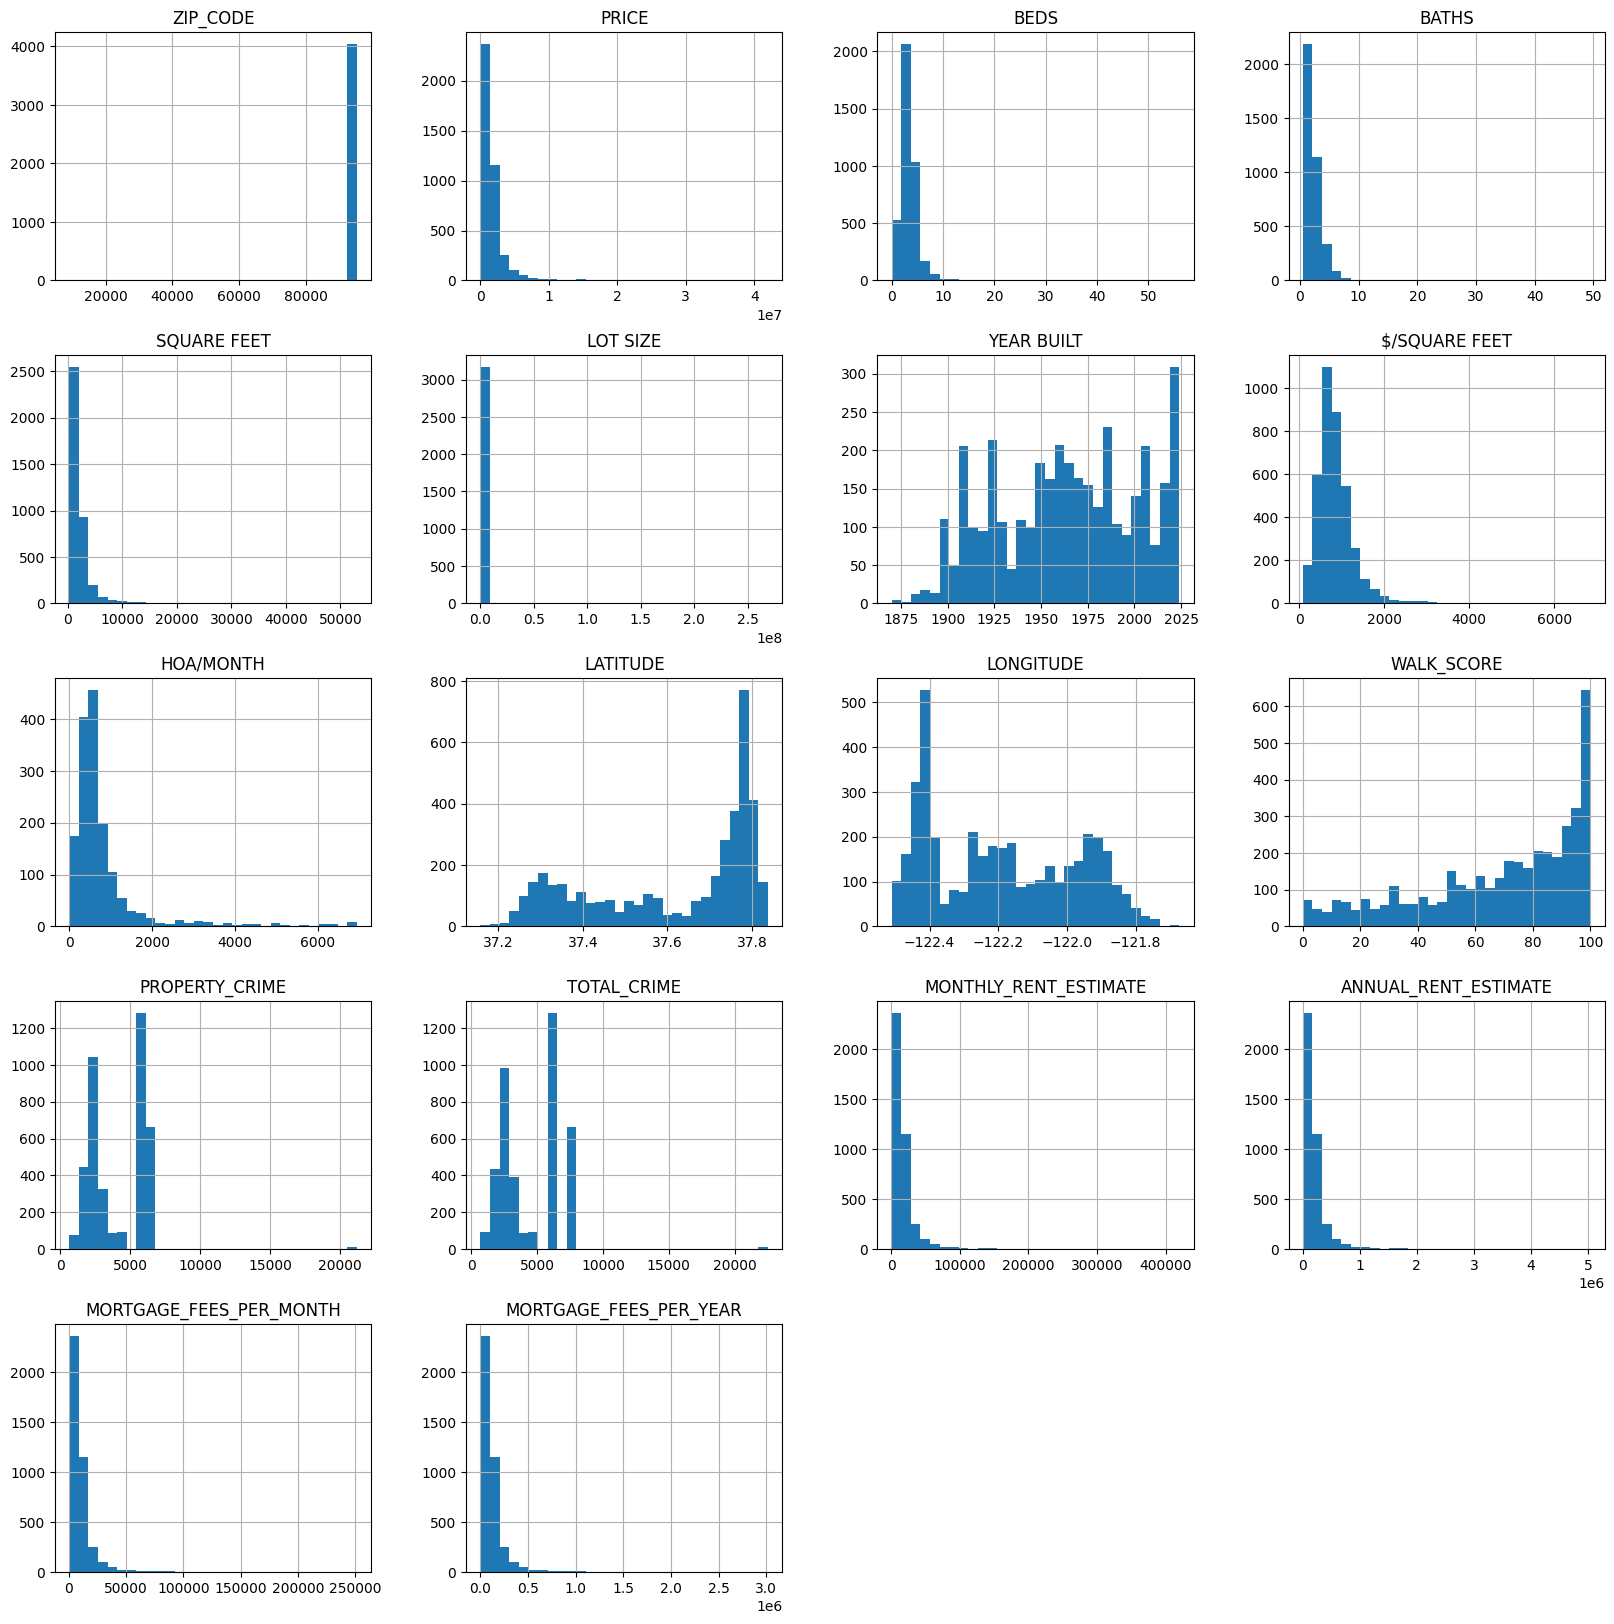

In [ ]:
data.hist(bins=30,figsize=[20,20])

columns of the dataset on the x-axis and the count of missing values for each column on the y-axis. Each bar represents a column, and the height of the bar indicates how many missing values that column has

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

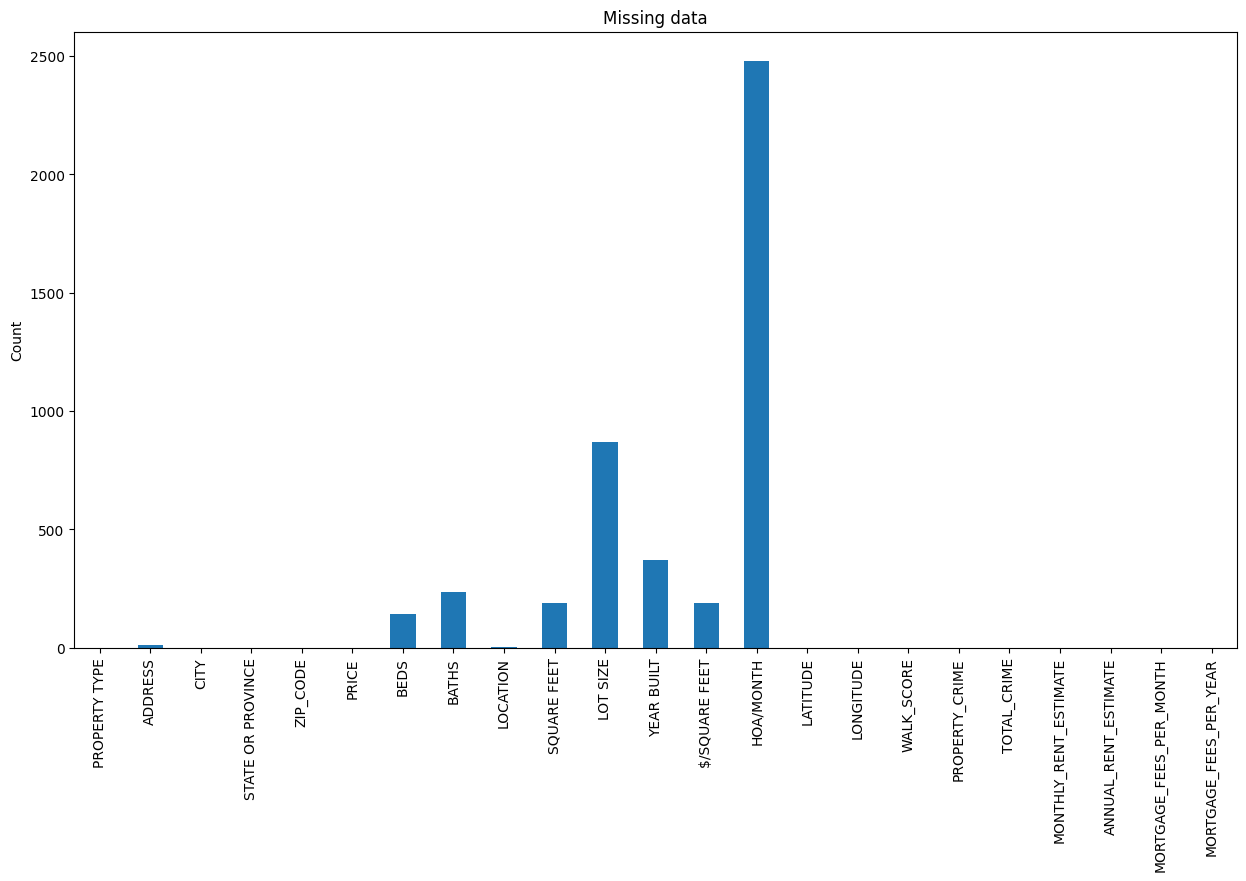

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3807 non-null   object 
 1   ADDRESS                  3796 non-null   object 
 2   CITY                     3807 non-null   object 
 3   STATE OR PROVINCE        3807 non-null   object 
 4   ZIP_CODE                 3807 non-null   int64  
 5   PRICE                    3807 non-null   float64
 6   BEDS                     3679 non-null   float64
 7   BATHS                    3585 non-null   float64
 8   LOCATION                 3804 non-null   object 
 9   SQUARE FEET              3631 non-null   float64
 10  LOT SIZE                 2990 non-null   float64
 11  YEAR BUILT               3453 non-null   float64
 12  $/SQUARE FEET            3631 non-null   float64
 13  HOA/MONTH                1485 non-null   float64
 14  LATITUDE                

In [ ]:
data.isnull().sum()

PROPERTY TYPE                 0
ADDRESS                      11
CITY                          0
STATE OR PROVINCE             0
ZIP_CODE                      0
PRICE                         0
BEDS                        128
BATHS                       222
LOCATION                      3
SQUARE FEET                 176
LOT SIZE                    817
YEAR BUILT                  354
$/SQUARE FEET               176
HOA/MONTH                  2322
LATITUDE                      0
LONGITUDE                     0
WALK_SCORE                    0
PROPERTY_CRIME                0
TOTAL_CRIME                   0
MONTHLY_RENT_ESTIMATE         0
ANNUAL_RENT_ESTIMATE          0
MORTGAGE_FEES_PER_MONTH       0
MORTGAGE_FEES_PER_YEAR        0
dtype: int64

#Data Imputation

The approach taken here is to replace missing values in specific columns with predefined values or computed statistics:

ADDRESS & LOCATION: Missing addresses and locations are replaced with the string 'Unknown'. This ensures that there's a placeholder value indicating the absence of genuine data.

BEDS, BATHS, SQUARE FEET, & LOT SIZE: For columns representing the number of bedrooms (BEDS), bathrooms (BATHS), property size in square feet (SQUARE FEET), and lot size (LOT SIZE), missing values are replaced with 0. This might indicate that the information wasn't provided or the property doesn't have any bedrooms or bathrooms (e.g., a plot of land).

YEAR BUILT: Missing values in the 'YEAR BUILT' column are replaced with the median year from the same column. The median is a central value that is less sensitive to outliers than the mean. Using the median ensures that the imputed value is representative of the typical property in the dataset.

$SQUARE FEET & HOA/MONTH: For the price per square foot ($/SQUARE FEET) and monthly homeowners association fees (HOA/MONTH), missing values are replaced with the mean (average) of the respective columns. The mean provides a central tendency of the data, offering a reasonable estimate for missing values.





In [ ]:

data.fillna({
    'ADDRESS': 'Unknown',
    'BEDS': 0,
    'BATHS': 0,
    'LOCATION': 'Unknown',
    'SQUARE FEET': 0,
    'LOT SIZE': 0,
    'YEAR BUILT': data['YEAR BUILT'].median(),
    '$/SQUARE FEET': data['$/SQUARE FEET'].mean(),
    'HOA/MONTH': data['HOA/MONTH'].mean()
}, inplace=True)

In [ ]:
data.isnull().sum()

PROPERTY TYPE              0
ADDRESS                    0
CITY                       0
STATE OR PROVINCE          0
ZIP_CODE                   0
PRICE                      0
BEDS                       0
BATHS                      0
LOCATION                   0
SQUARE FEET                0
LOT SIZE                   0
YEAR BUILT                 0
$/SQUARE FEET              0
HOA/MONTH                  0
LATITUDE                   0
LONGITUDE                  0
WALK_SCORE                 0
PROPERTY_CRIME             0
TOTAL_CRIME                0
MONTHLY_RENT_ESTIMATE      0
ANNUAL_RENT_ESTIMATE       0
MORTGAGE_FEES_PER_MONTH    0
MORTGAGE_FEES_PER_YEAR     0
dtype: int64

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

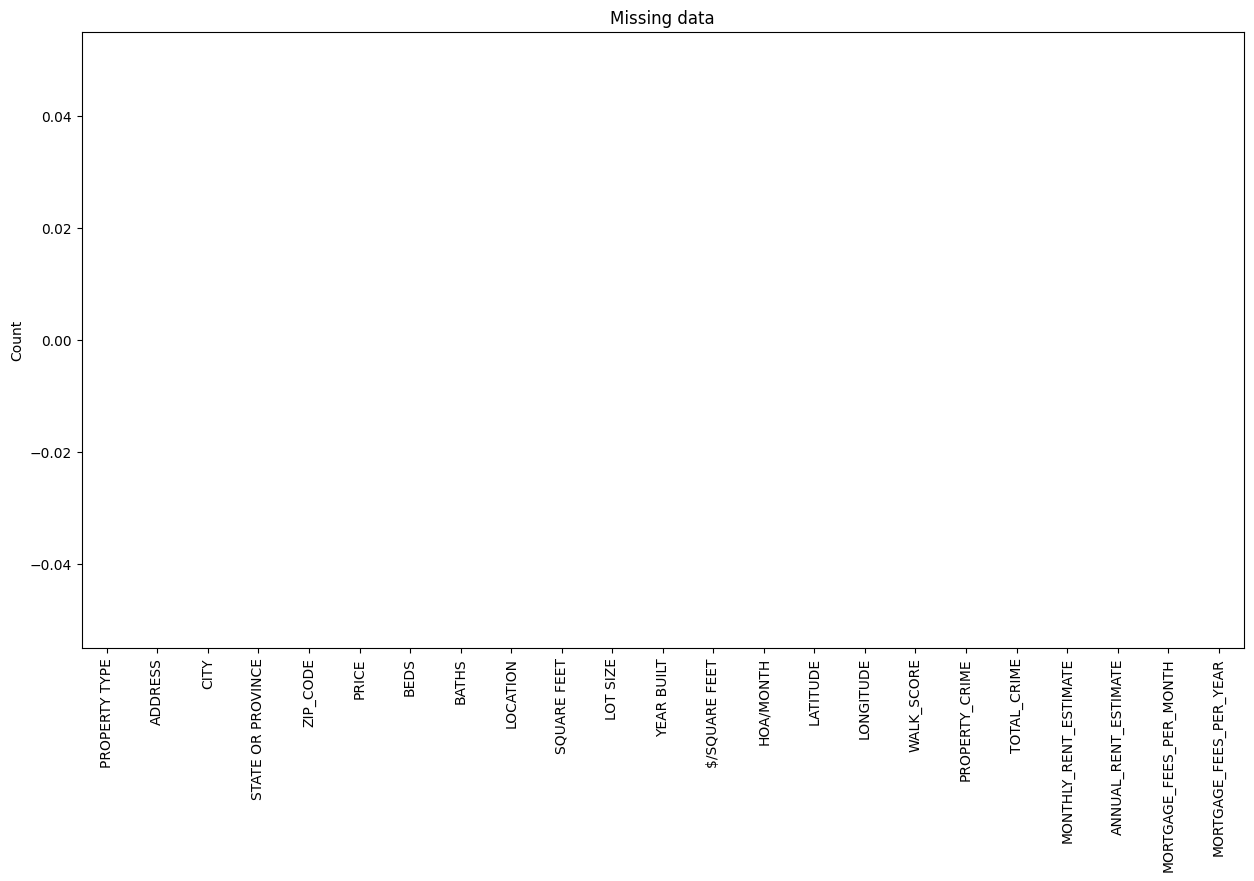

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3807 non-null   object 
 1   ADDRESS                  3807 non-null   object 
 2   CITY                     3807 non-null   object 
 3   STATE OR PROVINCE        3807 non-null   object 
 4   ZIP_CODE                 3807 non-null   int64  
 5   PRICE                    3807 non-null   float64
 6   BEDS                     3807 non-null   float64
 7   BATHS                    3807 non-null   float64
 8   LOCATION                 3807 non-null   object 
 9   SQUARE FEET              3807 non-null   float64
 10  LOT SIZE                 3807 non-null   float64
 11  YEAR BUILT               3807 non-null   float64
 12  $/SQUARE FEET            3807 non-null   float64
 13  HOA/MONTH                3807 non-null   float64
 14  LATITUDE                

In [ ]:
ds1=data.copy()

#Regression

The median WALK SCORE is: 78.0


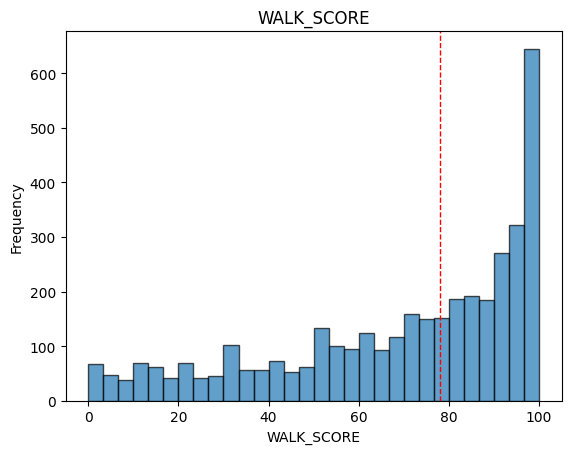

In [ ]:
from numpy.lib.polynomial import RankWarning
import matplotlib.pyplot as plt

# Calculate the median
walk_score_median = data['WALK_SCORE'].median()
print(f"The median WALK SCORE is: {walk_score_median}")

# Plot the distribution of the "PRICE" column with a vertical line indicating the median
plt.figure()
data['WALK_SCORE'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.axvline(walk_score_median, color='r', linestyle='dashed', linewidth=1)
plt.title('WALK_SCORE')
plt.xlabel('WALK_SCORE')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The median Property crime is: 5506.0


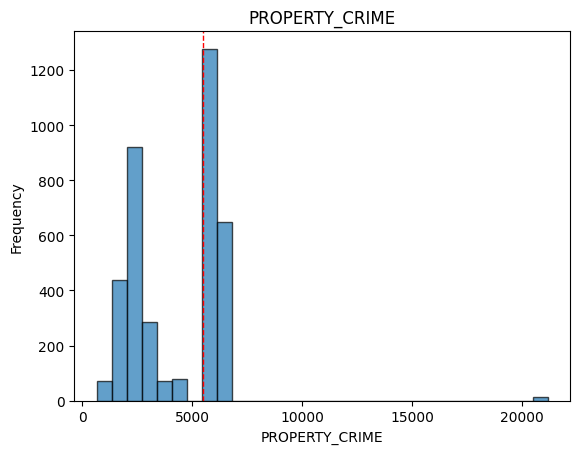

In [ ]:
from numpy.lib.polynomial import RankWarning
import matplotlib.pyplot as plt

# Calculate the median
property_crime_median = data['PROPERTY_CRIME'].median()
print(f"The median Property crime is: {property_crime_median}")

# Plot the distribution of the "PRICE" column with a vertical line indicating the median
plt.figure()
data['PROPERTY_CRIME'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.axvline(property_crime_median, color='r', linestyle='dashed', linewidth=1)
plt.title('PROPERTY_CRIME')
plt.xlabel('PROPERTY_CRIME')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The median total Property crime is: 6175.0


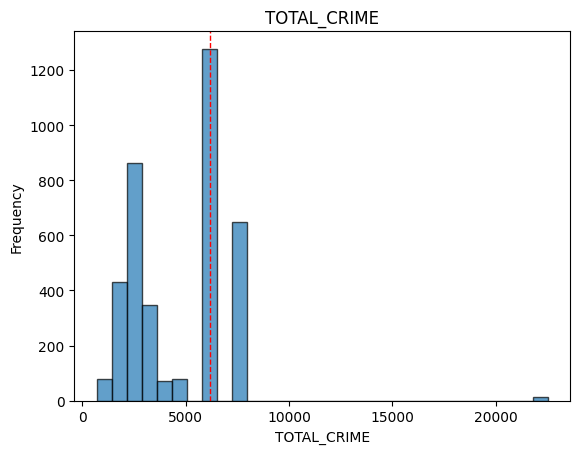

In [ ]:
from numpy.lib.polynomial import RankWarning
import matplotlib.pyplot as plt

# Calculate the median
total_crime_median = data['TOTAL_CRIME'].median()
print(f"The median total Property crime is: {total_crime_median}")

# Plot the distribution of the "PRICE" column with a vertical line indicating the median
plt.figure()
data['TOTAL_CRIME'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.axvline(total_crime_median, color='r', linestyle='dashed', linewidth=1)
plt.title('TOTAL_CRIME')
plt.xlabel('TOTAL_CRIME')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The provided code offers insights into the calculation of property tax and profit margin for a set of properties. Initially, the property tax rate is established at 1.25%, represented as 0.0125 in decimal form. This implies that for every dollar value of a property, 1.25 cents is owed as property tax.

The monthly revenue for each property is directly extracted from the `MONTHLY_RENT_ESTIMATE` column of the `data` DataFrame, signifying the estimated rent that can be garnered from the property each month. To determine the annual property tax for each property, the property's price from the `PRICE` column is multiplied by the property tax rate, with the result stored in a new column named `Property_Tax`.

Understanding the overall monthly expenses associated with a property requires considering several factors. These include mortgage fees from the `MORTGAGE_FEES_PER_MONTH` column, Homeowners Association (HOA) fees from the `HOA/MONTH` column, and the monthly property tax, which is the annual property tax divided by 12. By summing these components, the total monthly expenses for each property are derived.

A crucial metric in this analysis is the profit margin, which indicates the profitability of a property. It's determined by subtracting the total expenses from the total revenue and then dividing by the total revenue. This value is subsequently multiplied by 100 to express the profit margin as a percentage. This calculated profit margin percentage is then incorporated into the `data` DataFrame in a new column named `Profit_Margin_Percent`.

Consequently, the updated `data` DataFrame now encompasses two additional columns: `Property_Tax` and `Profit_Margin_Percent`. These additions furnish a comprehensive perspective on the financial dynamics of each property.

Here we are trying to classify whether buying a property generates profit or not.

In [ ]:
# Assuming you have the property_tax_rate as a decimal (e.g., 0.02 for a 2% tax rate)
property_tax_rate = 0.0125
total_revenue = data['MONTHLY_RENT_ESTIMATE']
# Calculate property tax based on the PRICE column
data['Property_Tax'] = (data['PRICE'] * property_tax_rate)

# Calculate total expenses including property tax
total_expenses = data['MORTGAGE_FEES_PER_MONTH'] + data['HOA/MONTH'] + (data['Property_Tax']/12)

# Calculate Profit Margin as a percentage
profit_margin_percent = ((total_revenue - total_expenses) / total_revenue) * 100

# Create a new column 'Profit_Margin_Percent' in your DataFrame
data['Profit_Margin_Percent'] = profit_margin_percent

data


,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,Property_Tax,Profit_Margin_Percent
0,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000.0,1.0,1.0,Adams Point,971.0,...,-122.254688,84.0,6421.0,7692.0,5350.0,64200.0,3203.0,38436.0,6687.5,19.695483
1,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000.0,1.0,1.0,Upper Rockridge,1265.0,...,-122.221226,30.0,6421.0,7692.0,10750.0,129000.0,6437.0,77244.0,13437.5,21.904724
2,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000.0,1.0,1.0,Emeryville Bordr,1051.0,...,-122.276067,90.0,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,7362.5,21.603707
3,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000.0,1.0,1.0,Adams Point,715.0,...,-122.255872,84.0,6421.0,7692.0,4390.0,52680.0,2629.0,31548.0,5487.5,17.988800
4,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000.0,1.0,1.0,Rose Garden,757.0,...,-122.249832,86.0,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,5237.5,20.466388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Vacant Land,236 Camino Al Lago,Atherton,CA,94027,20000000.0,0.0,0.0,ATHERTON,0.0,...,-122.206574,15.0,1523.0,1689.0,200000.0,2400000.0,119754.0,1437048.0,250000.0,29.287108
4038,Single Family Residential,303 Atherton Ave,Atherton,CA,94027,14988000.0,7.0,8.5,ATHERTON,11660.0,...,-122.217037,15.0,1523.0,1689.0,149880.0,1798560.0,89744.0,1076928.0,187350.0,29.146684
4039,Single Family Residential,481 Stockbridge Ave,Atherton,CA,94027,14500000.0,6.0,7.0,ATHERTON,9892.0,...,-122.229980,10.0,1523.0,1689.0,145000.0,1740000.0,86822.0,1041864.0,181250.0,29.127850
4040,Single Family Residential,48 Patricia Dr,Atherton,CA,94027,12850000.0,4.0,5.5,ATHERTON,7559.0,...,-122.212493,38.0,1523.0,1689.0,128500.0,1542000.0,76942.0,923304.0,160625.0,29.053800


In [ ]:
# Create a new column 'Invest_or_Not' based on the condition
data['Invest_or_Not']=np.where((data['Profit_Margin_Percent']>10),1, 0)

# Create a copy of the DataFrame
data_cp = data.copy()


In [ ]:
features_to_use = [
    'BEDS', 'BATHS', 'SQUARE FEET','PRICE' ,
     'WALK_SCORE','Invest_or_Not',
    'PROPERTY_CRIME', 'TOTAL_CRIME','MONTHLY_RENT_ESTIMATE','MORTGAGE_FEES_PER_MONTH'
]


ds1 = data[features_to_use]

#Muller loop to establish a baseline based on classifers

Classifier = Nearest Neighbors, Score (test, accuracy) = 96.06, Training time = 0.72 seconds F1 Score=0.93,
Classifier = Linear SVM, Score (test, accuracy) = 95.54, Training time = 0.19 seconds F1 Score=0.49,
Classifier = RBF SVM, Score (test, accuracy) = 97.64, Training time = 0.74 seconds F1 Score=0.89,
Classifier = Decision Tree, Score (test, accuracy) = 99.08, Training time = 0.02 seconds F1 Score=0.96,
Classifier = Random Forest, Score (test, accuracy) = 98.69, Training time = 0.05 seconds F1 Score=0.92,
Classifier = Neural Net, Score (test, accuracy) = 96.46, Training time = 10.43 seconds F1 Score=0.72,
Classifier = AdaBoost, Score (test, accuracy) = 98.29, Training time = 0.66 seconds F1 Score=0.93,
Classifier = Naive Bayes, Score (test, accuracy) = 74.28, Training time = 0.01 seconds F1 Score=0.55,
Classifier = QDA, Score (test, accuracy) = 79.79, Training time = 0.04 seconds F1 Score=0.61,
--------------------------------------------------------------------------------
Best --

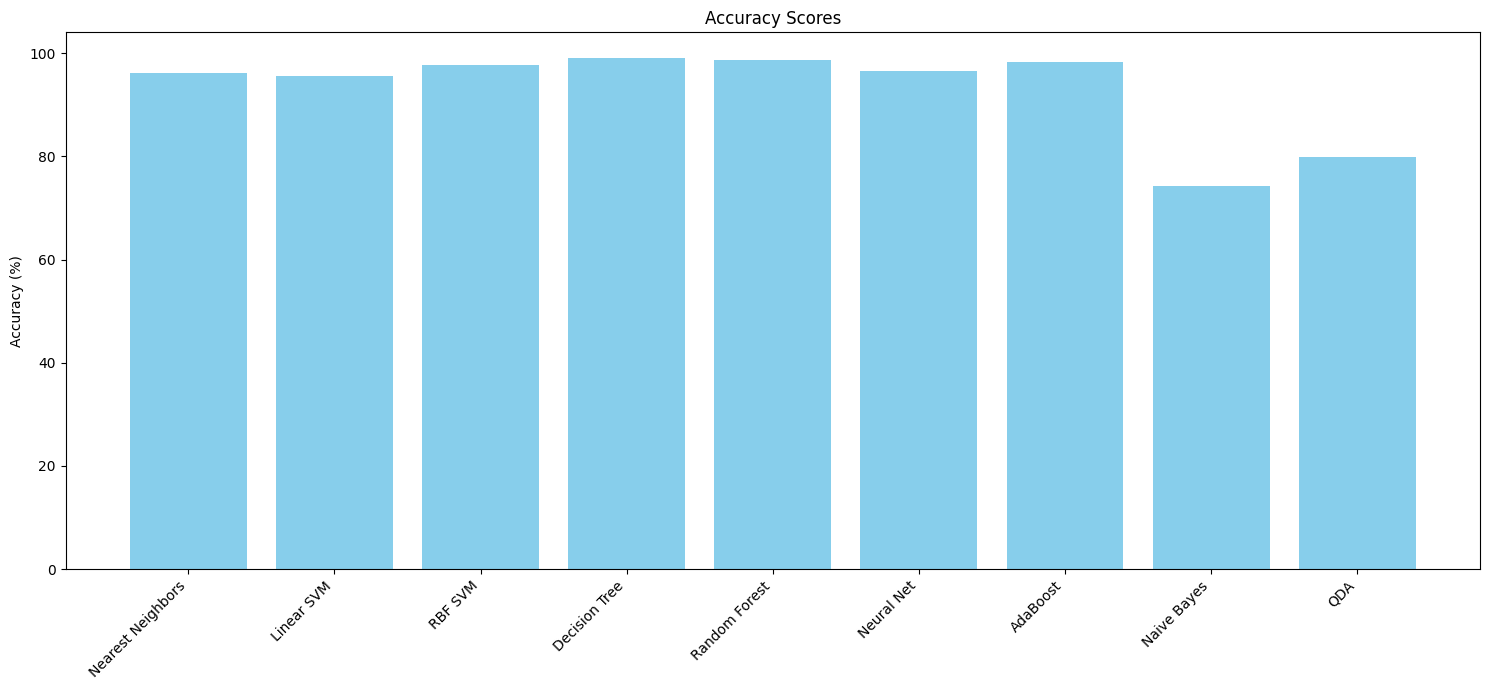

DecisionTreeClassifier(max_depth=5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

def muller_loop(X, y):
    # Scaling
    X1 = StandardScaler().fit_transform(X)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=.2)

    max_score = 0.0
    max_class = ''

    accuracies = []

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time()
        clf.fit(X1_train, y1_train)
        pred = clf.predict(X1_train)
        f1 = f1_score(y1_train, pred, average='macro')
        score = 100.0 * clf.score(X1_test, y1_test)

        accuracies.append(score)

        print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time), 'F1 Score=%.2f,'%(f1))

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

    fig, ax = plt.subplots(figsize=(15, 7))

    # Plotting accuracy scores
    ax.bar(names, accuracies, color='skyblue')
    ax.set_title("Accuracy Scores")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xticks(np.arange(len(names)))  # This line is added to fix the warning
    ax.set_xticklabels(names, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    return clf_best


# Call muller_loop
X = ds1.drop(columns=['Invest_or_Not'])
y = ds1['Invest_or_Not']
muller_loop(X, y)

The provided code revolves around evaluating various machine learning classifiers' performance in classifying a given dataset (ds1). These classifiers come from the Scikit-learn library and are set to tackle binary classification problems

**1. Imports and Initial Setup:**
- Essential libraries for data processing, visualization, and machine learning are imported.
  
**2. Classifier Definitions:**
- Classifier names and corresponding initialized classifier objects are stored in lists: `names` and `classifiers`.

**3. muller_loop Function:**
- Takes feature set `X` and target labels `y` as inputs.

   - **Data Preprocessing:**
     - Features are standardized.
     - Data is split into training and testing sets.
   
   - **Classifier Evaluation:**
     - Each classifier is trained and evaluated for accuracy and F1 score.
     - Results (accuracy, training time, F1 score) are printed.
   
   - **Best Classifier Identification:**
     - The classifier with the highest accuracy on the testing set is determined.

   - **Visualization:**
     - A bar graph of classifier accuracies is plotted.

**4. Function Invocation:**
- Dataset `ds1` is partitioned into features and target labels.
- The `muller_loop` function is executed to determine and visualize the best classifier.

To summarize, the code evaluates various classifiers on a given dataset (ds1), aiming to identify the best one in terms of accuracy. It provides an overview of the performance (accuracy and F1 score) of each classifier, accompanied by a visual representation in the form of a bar graph. The best-performing classifier is highlighted and returned at the end

#Decision tree classifier

                   Feature  Importance
7    MONTHLY_RENT_ESTIMATE    0.617248
6              TOTAL_CRIME    0.110226
2              SQUARE FEET    0.107481
4               WALK_SCORE    0.065155
8  MORTGAGE_FEES_PER_MONTH    0.040017
3                    PRICE    0.027040
0                     BEDS    0.017045
1                    BATHS    0.008917
5           PROPERTY_CRIME    0.006871


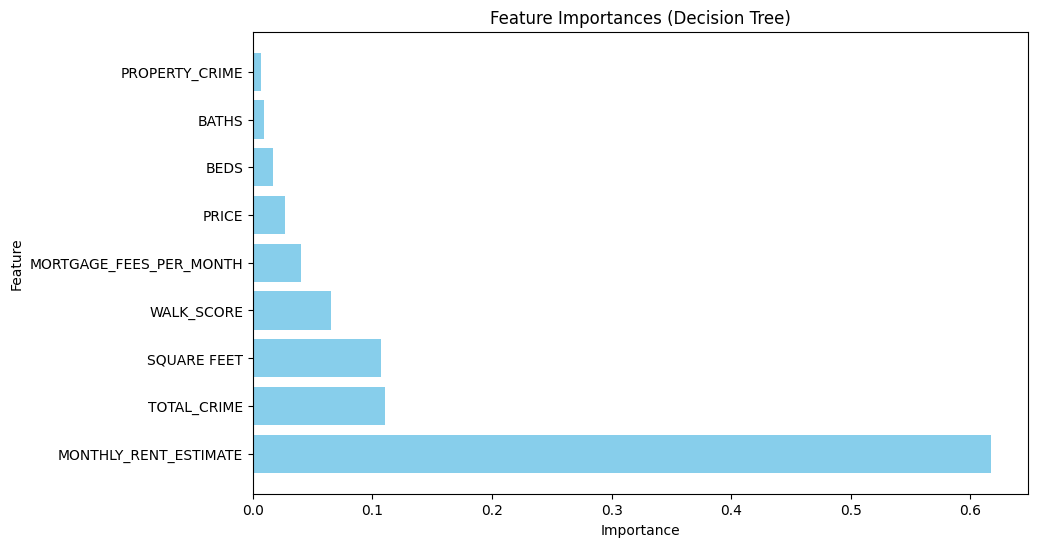

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


X = ds1.drop(columns=['Invest_or_Not'])
y = ds1['Invest_or_Not']

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Set plot labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Decision Tree)')

# Show the plot
plt.show()



**1. Imports and Data Setup:**
- Libraries for data handling (`pandas`) and machine learning (`DecisionTreeClassifier` from Scikit-learn) are imported.
- Dataset `ds1` is split into feature set `X` (excluding the 'Invest_or_Not' column) and target labels `y`.

**2. Decision Tree Initialization and Training:**
- A Decision Tree classifier is initialized with a set random state for reproducibility.
- The classifier is trained on the dataset (`X` and `y`).

**3. Feature Importance Extraction:**
- The trained classifier's `.feature_importances_` attribute is used to extract the importance of each feature.

**4. DataFrame Creation and Display:**
- A new DataFrame, `feature_importance_df`, is created to hold feature names and their corresponding importances.
- This DataFrame is sorted in descending order based on feature importances, and the sorted list is displayed.

**5. Visualization of Feature Importances:**
- A horizontal bar chart is plotted using `matplotlib` to showcase the importance of each feature visually.
- The plot is labeled appropriately and displayed.

A Decision Tree classifier on the dataset `ds1` and extracts the importance scores assigned to each feature. These importances are then displayed in both tabular and graphical formats to offer insights into which features most influence the classifier's decisions.

Here we see rent, total crime have the highest feature importance.

#Visualizations

In [ ]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.1 MB/s eta 0:00:00


## Upsampling and Downsampling for rent

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def split_dataset(data, feature_column, target_column, test_size=0.1, random_state=31):
    # Extract feature and target vectors
    X = data[[feature_column]]
    y = data[target_column]

    # Impute missing values using mean strategy
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def upsample_dataset(X_train, y_train):
    # Apply SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy='minority')
    upsampled_X_train, upsampled_y_train = smote.fit_resample(X_train, y_train)
    return upsampled_X_train, upsampled_y_train

def downsample_dataset(X_train, y_train):
    # Apply Edited Nearest Neighbours to downsample the majority class
    enn = EditedNearestNeighbours(sampling_strategy='majority')
    downsampled_X_train, downsampled_y_train = enn.fit_resample(X_train, y_train)
    return downsampled_X_train, downsampled_y_train

def process_dataset(data, feature_column, target_column, upsample=False, downsample=False):
    X_train, X_test, y_train, y_test = split_dataset(data, feature_column, target_column)

    if upsample:
        X_train, y_train = upsample_dataset(X_train, y_train)
    elif downsample:
        X_train, y_train = downsample_dataset(X_train, y_train)

    return X_train, X_test, y_train, y_test


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from time import time
import holoviews as hv

def run_mloop_new_classifiers(feature_choice="MONTHLY_RENT_ESTIMATE", distribution_choice="default"):
    max_score = 0.0
    max_classifier = ''
    i = 1

    classifier_names = [
    "RBF SVM",
    "Random Forest",
    "Decision Tree",
]
    classifiers = [
    SVC(kernel="rbf"),  # RBF SVM
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # Random Forest
    DecisionTreeClassifier(max_depth=5),  # Decision Tree
]

    # Prepare Dataset
    selected_features = ['MONTHLY_RENT_ESTIMATE', 'PRICE', 'MORTGAGE_FEES_PER_MONTH']
    X = ds1[[feature_choice]]
    y = ds1['Invest_or_Not']
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
    if (distribution_choice == "down"):
        X_train, X_test, y_train, y_test = process_dataset(ds1, feature_choice, 'Invest_or_Not', downsample=True)
    elif(distribution_choice == "up"):
        X_train, X_test, y_train, y_test = process_dataset(ds1, feature_choice, 'Invest_or_Not', upsample=True)

    scatter_list = []
    confusion_matrix_list = []

    for classifier_name, classifier in zip(classifier_names, classifiers):
        start_time = time()
        clf = classifier
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        confusion_matrix_list.append(cm)

        train_time = time() - start_time

        if f1 > max_score:
            max_score = f1
            max_classifier = classifier_name

        scatter = hv.Scatter((train_time, f1), 'Training Time', 'F1 Score').opts(
            width=900, height=300, size=10, title='F1 ' + distribution_choice + '-sample distribution using ' + feature_choice
        ).redim.label(Training_Time='Training time', F1_Score='F1 Score')
        scatter_list.append(scatter * hv.Text(train_time, f1, classifier_name))

    # Combine all scatter plots
    plot = hv.Overlay(scatter_list).opts(legend_position='top')

    return plot, confusion_matrix_list


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
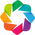

Column
    [0] DiscreteSlider(formatter='%d', name='Distribution', options={'down': -1, 'default': 0,...}, value=-1)
    [1] HoloViews(Overlay, height=300, sizing_mode='fixed', width=900)
    [2] Matplotlib(Figure)
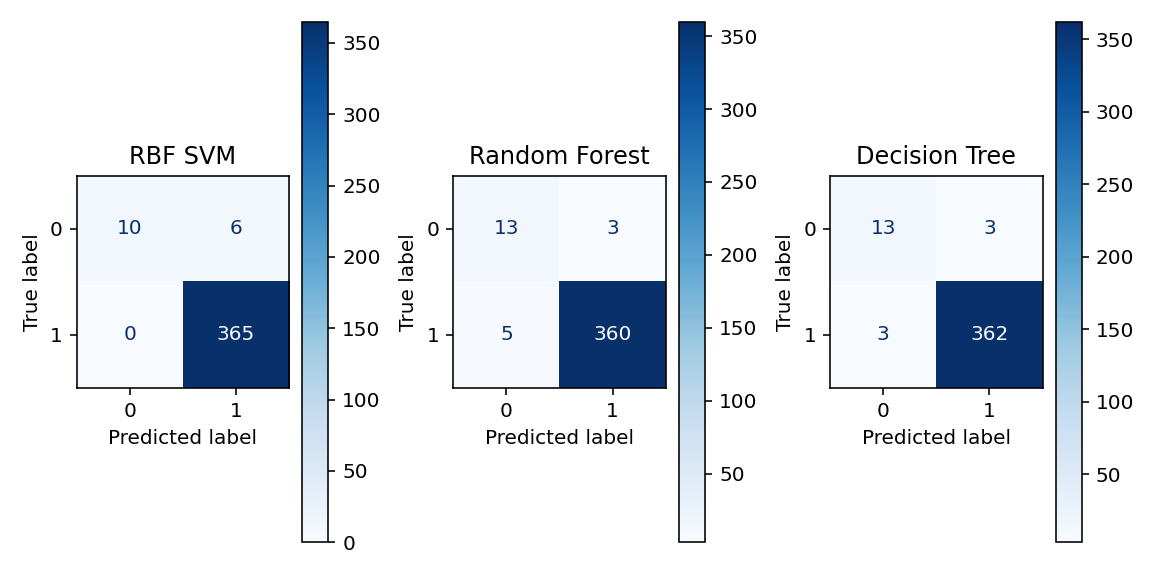

In [ ]:
import panel as pn
import holoviews as hv
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from io import BytesIO
import base64
hv.extension('bokeh')

# Define the distribution slider
distribution_slider = pn.widgets.DiscreteSlider(name='Distribution', options={'down': -1, 'default': 0, 'up': 1})

# Create a Panel object to hold the HoloViews plot
graph_pane = pn.pane.HoloViews()
# Create a Panel object to hold the Matplotlib confusion matrices
confusion_matrix_pane = pn.pane.Matplotlib()

# Define the classifier names
classifier_names = [
    "RBF SVM",
    "Random Forest",
    "Decision Tree",
]



def update_graph_and_confusion_matrix(event):
    if event.new == -1:
        hv_plot, cm_list = run_mloop_new_classifiers(distribution_choice="down")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    elif event.new == 1:
        hv_plot, cm_list = run_mloop_new_classifiers(distribution_choice="up")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    else:
        hv_plot, cm_list = run_mloop_new_classifiers()
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)

# Watch the slider value for changes and call update_graph_and_confusion_matrix when it changes
distribution_slider.param.watch(update_graph_and_confusion_matrix, 'value')

# Set up the layout with the slider, graph_pane, and confusion_matrix_pane
layout = pn.Column(distribution_slider, graph_pane, confusion_matrix_pane)

# Initialize the graph_pane and confusion_matrix_pane with the current slider value
mock_event = type('obj', (object,), {'new': distribution_slider.value})
update_graph_and_confusion_matrix(mock_event)

layout

layout.servable()

Here from the graphs we can see that upsampling the data gets a better F1 score than downsampling.

 Upsampling:By generating synthetic data points with higher rental estimates, we can explore investment opportunities with the potential for greater rental income. This can be attractive to business owners looking to maximize their cash flow.

 Downsampling:Lower-rent properties often attract long-term tenants who are less likely to move frequently. Downsampling can lead to more stable and predictable rental income, reducing the hassle of tenant turnover.


Feature - TOTAL_CRIME

## Upsampling and DownSampling Total Crime

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def split_tc_dataset(data, feature_column, target_column, test_size=0.1, random_state=31):
    # Extract feature and target vectors
    X = data[[feature_column]]
    y = data[target_column]

    # Impute missing values using mean strategy
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def upsample_total_crime(X_train, y_train):
    # Apply SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy='minority')
    upsampled_X_train, upsampled_y_train = smote.fit_resample(X_train, y_train)
    return upsampled_X_train, upsampled_y_train

def downsample_total_crime(X_train, y_train):
    # Apply Edited Nearest Neighbours to downsample the majority class
    enn = EditedNearestNeighbours(sampling_strategy='majority')
    downsampled_X_train, downsampled_y_train = enn.fit_resample(X_train, y_train)
    return downsampled_X_train, downsampled_y_train

def process_total_crime(data, feature_column, target_column, upsample=False, downsample=False):
    X_train, X_test, y_train, y_test = split_tc_dataset(data, feature_column, target_column)

    if upsample:
        X_train, y_train = upsample_total_crime(X_train, y_train)
    elif downsample:
        X_train, y_train = downsample_total_crime(X_train, y_train)

    return X_train, X_test, y_train, y_test

## Re-run muller loop on upsampled and downsampled data

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from time import time
import holoviews as hv

def run_muller_loop_new_classifiers(feature_choice="TOTAL_CRIME", distribution_choice="default"):
    max_score = 0.0
    max_classifier = ''
    i = 1

    classifier_names = [
    "Nearest Neighbors",
    "Random Forest",
    "Decision Tree",
]
    classifiers = [
    SVC(kernel="rbf"),  # RBF SVM
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # Random Forest
    DecisionTreeClassifier(max_depth=5),  # Decision Tree
]

    # Prepare Dataset
    selected_features = ['TOTAL_CRIME']
    X = ds1[[feature_choice]]
    y = ds1['Invest_or_Not']
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
    if (distribution_choice == "down"):
        X_train, X_test, y_train, y_test = process_total_crime(ds1, feature_choice, 'Invest_or_Not', downsample=True)
    elif(distribution_choice == "up"):
        X_train, X_test, y_train, y_test = process_total_crime(ds1, feature_choice, 'Invest_or_Not', upsample=True)

    scatter_list = []
    confusion_matrix_list = []

    for classifier_name, classifier in zip(classifier_names, classifiers):
        start_time = time()
        clf = classifier
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        confusion_matrix_list.append(cm)

        train_time = time() - start_time

        if f1 > max_score:
            max_score = f1
            max_classifier = classifier_name

        scatter = hv.Scatter((train_time, f1), 'Training Time', 'F1 Score').opts(
            width=900, height=300, size=10, title='F1 ' + distribution_choice + '-sample distribution using ' + feature_choice
        ).redim.label(Training_Time='Training time', F1_Score='F1 Score')
        scatter_list.append(scatter * hv.Text(train_time, f1, classifier_name))

    # Combine all scatter plots
    plot = hv.Overlay(scatter_list).opts(legend_position='top')

    return plot, confusion_matrix_list

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
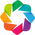

Column
    [0] DiscreteSlider(formatter='%d', name='Distribution', options={'down': -1, 'default': 0,...}, value=-1)
    [1] HoloViews(Overlay, height=300, sizing_mode='fixed', width=900)
    [2] Matplotlib(Figure)
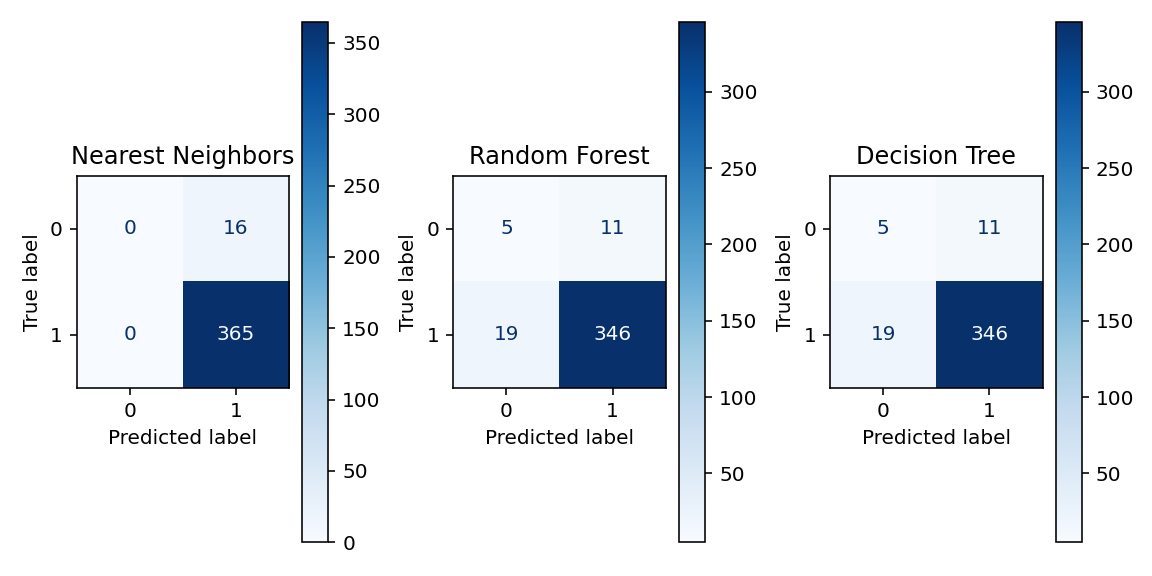

In [ ]:
import panel as pn
import holoviews as hv
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from io import BytesIO
import base64
hv.extension('bokeh')

# Define the distribution slider
distribution_slider = pn.widgets.DiscreteSlider(name='Distribution', options={'down': -1, 'default': 0, 'up': 1})

# Create a Panel object to hold the HoloViews plot
graph_pane = pn.pane.HoloViews()
# Create a Panel object to hold the Matplotlib confusion matrices
confusion_matrix_pane = pn.pane.Matplotlib()

# Define the classifier names
classifier_names = [
    "Nearest Neighbors",
    "Random Forest",
    "Decision Tree",
]



def updating_graph_and_confusion_matrix(event):
    if event.new == -1:
        hv_plot, cm_list = run_muller_loop_new_classifiers(distribution_choice="down")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    elif event.new == 1:
        hv_plot, cm_list = run_muller_loop_new_classifiers(distribution_choice="up")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    else:
        hv_plot, cm_list = run_muller_loop_new_classifiers()
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)

# Watch the slider value for changes and call updating_graph_and_confusion_matrix when it changes
distribution_slider.param.watch(updating_graph_and_confusion_matrix, 'value')

# Set up the layout with the slider, graph_pane, and confusion_matrix_pane
layout = pn.Column(distribution_slider, graph_pane, confusion_matrix_pane)

# Initialize the graph_pane and confusion_matrix_pane with the current slider value
mock_event = type('obj', (object,), {'new': distribution_slider.value})
updating_graph_and_confusion_matrix(mock_event)

layout

layout.servable()

We can notice from the above graphs that downsampling the data produces a greater F1 score

Upsampling : By generating synthetic data points with higher crime rates, investors and analysts can assess potential real estate investment opportunities in neighborhoods with elevated crime levels. This allows for a more in-depth analysis of the financial risks and rewards associated with properties in these areas.

Downsampling : can be beneficial when focusing on properties in low-crime neighborhoods. These properties often attract long-term tenants, resulting in more stable and predictable rental income.

#Conclusion

1. **Feature Selection and Regression Analysis:**
   - The dataset was processed to create a new feature 'Invest_or_Not' based on the condition of 'Profit_Margin_Percent' being greater than 10%. This binary classification helped in determining whether to invest or not.
   - A subset of features was selected for the regression analysis, including 'BEDS', 'BATHS', 'SQUARE FEET', 'PRICE', 'WALK_SCORE', 'Invest_or_Not', 'PROPERTY_CRIME', 'TOTAL_CRIME', 'MONTHLY_RENT_ESTIMATE', and 'MORTGAGE_FEES_PER_MONTH'.

2. **Model Selection and Performance:**
   - A Muller loop was employed to establish a baseline for classifiers. The Decision Tree classifier emerged as the best performer with an impressive accuracy score of 99.08% on the test data.

3. **Feature Importance:**
   - The Decision Tree classifier was further used to determine the importance of each feature. The results highlighted:
     - 'MONTHLY_RENT_ESTIMATE' as the most influential feature with an importance of 61.72%.
     - 'TOTAL_CRIME' and 'SQUARE FEET' followed with importances of 11.02% and 10.75%, respectively.
     - Other features like 'WALK_SCORE', 'PRICE', 'BEDS', and 'BATHS' had relatively lower importances.

4. **Data Imbalance and Resampling:**
   - Visualizations were employed to analyze the effects of upsampling and downsampling on the 'rent' feature.
   - It was observed that upsampling the data resulted in a better F1 score compared to downsampling. This indicates that increasing the minority class samples (upsampling) led to a more balanced dataset, which in turn improved the model's performance in terms of the F1 score.
   - A similar analysis was conducted for the 'Total Crime' feature using techniques like SMOTE for oversampling and EditedNearestNeighbours for undersampling.

5. **Re-evaluation with Resampled Data:**
   - After resampling, the Muller loop was re-run to evaluate the performance of classifiers on the upsampled and downsampled data.
   - The graphs indicated that downsampling the data yielded a higher F1 score. This suggests that reducing the majority class samples (downsampling) might be more effective for certain features or datasets.

6. **Final Thoughts:**
   - The analysis underscores the significance of 'MONTHLY_RENT_ESTIMATE' and 'TOTAL_CRIME' in determining investment decisions. These features can be pivotal for stakeholders and investors.
   - Addressing data imbalance through resampling techniques can significantly impact model performance. While upsampling proved beneficial for the 'rent' feature, downsampling was more effective after considering 'Total Crime'.
   - It's essential to continually evaluate and iterate on the model, especially when dealing with imbalanced datasets, to ensure robust and reliable predictions.
   -Upsampling of RENT can help the business cater to a diverse range of tenants, including those willing to pay premium rents for specific amenities or locations. Including higher-rent properties in the portfolio diversifies your real estate holdings. This diversification can help spread risk and provide a hedge against market fluctuations.Higher rental income potential can lead to improved profitability for your real estate investments, which can be particularly advantageous in competitive markets.

   - Downsampling of RENT can help business cater to individuals who are looking for lower-rent properties  which may be less affected by economic downturns, making them a more resilient investment during challenging times.If the business is entering a new market, downsampling can be a cost-effective way to establish a presence while gaining insights into local rental dynamics.Lower rents make properties more affordable to a broader range of potential tenants, increasing the pool of applicants and reducing vacancy rates.

   - Upsampling "total_crime" data is beneficial for investors as it allows them to assess investment opportunities in neighborhoods with higher crime rates. By generating synthetic data points that reflect elevated crime levels, investors can gain a more comprehensive understanding of the potential financial risks and rewards associated with such properties. This approach helps in conducting a thorough risk assessment and aids in making informed investment decisions.

   - Downsampling "total_crime" data is advantageous for investors who prioritize stability and predictability in their real estate investments. By emphasizing properties in low-crime neighborhoods, downsampling helps investors secure a stable rental income stream. Properties in these areas typically attract long-term tenants who are less likely to move frequently, reducing tenant turnover and associated costs. This approach also simplifies financial planning, enabling investors to model and predict rental income with greater accuracy.


